In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os

In [ ]:
raw_image_directory = 'C:/Users/Mittal/Desktop/thoracic_seg/raw_images/'
ground_truth_directory = 'C:/Users/Mittal/Desktop/thoracic_seg/segmentations/'
unet_directory = 'C:/Users/Mittal/Desktop/thoracic_seg/unet_predictions/'
unetpp_directory = 'C:/Users/Mittal/Desktop/thoracic_seg/unet++_predictions/'

raw_images = sorted(os.listdir(raw_image_directory))
segmentations = sorted(os.listdir(ground_truth_directory))
unet_predictions = sorted(os.listdir(unet_directory))
unetpp_predictions = sorted(os.listdir(unetpp_directory))

image_dataset = []
mask_dataset = []
unet_prediction_dataset = []
unetpp_prediction_dataset = []
image_names = []

for image_name in raw_images:    
    if (image_name.split('.')[1] == 'nii'):
        base_name = image_name.split('.')[0]
        image = nib.load(raw_image_directory+image_name).get_fdata()
        segmentation = nib.load(ground_truth_directory+image_name).get_fdata()
        unet = nib.load(unet_directory+image_name).get_fdata()
        unetpp = nib.load(unetpp_directory+image_name).get_fdata()
        
        image_dataset.append(np.array(image))
        mask_dataset.append(np.array(segmentation))
        unet_prediction_dataset.append(np.array(unet))
        unetpp_prediction_dataset.append(np.array(unetpp))
        image_names.append(base_name)

In [3]:
num_classes = 7
stats = {}

allComparisons = {"GroundTruth": mask_dataset, "Unet": unet_prediction_dataset, "Unet++":unetpp_prediction_dataset}
slices = {"Mid-Slice+1":1, "Mid-Slice":0, "Mid-Slice-1":-1}

for i in range(len(image_dataset)):
    image = image_dataset[i]
    image_name = image_names[i]
    mid_slice = image.shape[2]//2
    for slice_label, offset in slices.items():
        row_key = f"{image_name}_{slice_label}"
        stats[row_key] = {}
        for model_name, model_masks in allComparisons.items():
            for j in range(num_classes-2):
                mask_class = model_masks[i]==(j+2)
                slice_data = (mask_class*image)[:,:,mid_slice+offset] 
                slice_data = slice_data[slice_data!=0]
                mean = np.mean(slice_data) if slice_data.size>0 else 0
                std = np.std(slice_data) if slice_data.size>0 else 0
                stats[row_key][model_name, f"Cylinder {j+1}", "Mean"] = mean
                stats[row_key][model_name, f"Cylinder {j+1}", "Std"] = std

In [4]:
import pandas as pd

df = pd.DataFrame.from_dict(stats, orient='index')
df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Model', 'Cylinder', 'Stat'])
df.index.name = "Image_Slice"
df

Model                                       GroundTruth                       \
Cylinder                                     Cylinder 1           Cylinder 2   
Stat                                               Mean       Std       Mean   
Image_Slice                                                                    
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice+1       41.316129  5.242204  33.524590   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice         40.333333  7.166816  31.925170   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice-1       41.094937  8.441750  33.095890   
A21_02_FatFrac_2D_FAM_BH_18_Mid-Slice+1        0.000000  0.000000   0.000000   
A21_02_FatFrac_2D_FAM_BH_18_Mid-Slice          0.000000  0.000000   0.000000   
...                                                 ...       ...        ...   
A21_19_FatFrac_IDEAL_IQ_PDFF_22_Mid-Slice      0.000000  0.000000   0.000000   
A21_19_FatFrac_IDEAL_IQ_PDFF_22_Mid-Slice-1    0.000000  0.000000   0.000000   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice+1   41.055556  9.830822  31.108108   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice     41.479730  6.489565  30.439189   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice-1   41.162162  6.650598  30.560811   

Model                                                                        \
Cylinder                                               Cylinder 3             
Stat                                               Std       Mean       Std   
Image_Slice                                                                   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice+1       5.315016  25.000000  4.876862   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice         4.796666  21.632653  4.552164   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice-1       5.916460  22.713287  3.988835   
A21_02_FatFrac_2D_FAM_BH_18_Mid-Slice+1       0.000000   0.000000  0.000000   
A21_02_FatFrac_2D_FAM_BH_18_Mid-Slice         0.000000   0.000000  0.000000   
...                                                ...        ...       ...   
A21_19_FatFrac_IDEAL_IQ_PDFF_22_Mid-Slice     0.000000   0.000000  0.000000   
A21_19_FatFrac_IDEAL_IQ_PDFF_22_Mid-Slice-1   0.000000   0.000000  0.000000   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice+1  10.306214  20.858108  4.753392   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice     9.044355  21.006757  4.855335   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice-1   7.745292  20.216216  5.035738   

Model                                                                        \
Cylinder                                    Cylinder 4           Cylinder 5   
Stat                                              Mean       Std       Mean   
Image_Slice                                                                   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice+1      16.512821  7.062136   9.156522   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice        14.671429  2.844651   3.573643   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice-1      12.957447  3.956989   0.623656   
A21_02_FatFrac_2D_FAM_BH_18_Mid-Slice+1       0.000000  0.000000   0.000000   
A21_02_FatFrac_2D_FAM_BH_18_Mid-Slice         0.000000  0.000000   0.000000   
...                                                ...       ...        ...   
A21_19_FatFrac_IDEAL_IQ_PDFF_22_Mid-Slice     0.000000  0.000000   0.000000   
A21_19_FatFrac_IDEAL_IQ_PDFF_22_Mid-Slice-1   0.000000  0.000000   0.000000   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice+1  11.436364  7.655690  -1.149533   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice    11.830303  7.445661  -0.262500   
A21_31_FatFrac_3D_Iron_Quant_17_Mid-Slice-1  12.347305  7.694720  -0.384615   

Model                                                  ...     Unet++  \
Cylinder                                               ... Cylinder 1   
Stat                                              Std  ...       Mean   
Image_Slice                                            ...              
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice+1      4.713701  ...  40.187661   
A21_02_FatFrac_2D_FAM_BH_14_Mid-Slice        1.674131  ...  46

In [7]:
# Save DataFrame to an Excel file
df.to_excel('stats_dataframe.xlsx', index=True)  # Include index (file names)


In [6]:
import tensorflow as tf
from collections import defaultdict

def dice_coef(y_true, y_pred):
    total_dice = 0.0
    num_class = 0.0
    for class_idx in range(num_classes):
        y_true_class = y_true[..., class_idx]
        y_pred_class = y_pred[..., class_idx]
        y_true_f = tf.keras.backend.flatten(y_true_class)
        y_pred_f = tf.keras.backend.flatten(y_pred_class)
        intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
        intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
        dice = (2. * intersection) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1e-7)
        total_dice = total_dice + dice
        num_class = num_class + 1.0
    mean_dice_score = total_dice / num_class
    return mean_dice_score

def tpr(y_true, y_pred, threshold=0.5):
    total_tpr = 0
    num_class = 0
    for class_idx in range(num_classes):
        y_true_class = y_true[..., class_idx]
        y_pred_class = y_pred[..., class_idx]
        y_pred_pos = tf.cast(y_pred_class > threshold, tf.float32)
        y_true_pos = tf.cast(y_true_class > threshold, tf.float32)
        true_pos = tf.reduce_sum(tf.cast(tf.logical_and(y_true_pos == 1, y_pred_pos == 1), tf.float32))
        actual_pos = tf.reduce_sum(tf.cast(y_true_pos, tf.float32))
        tpr = true_pos / (actual_pos + tf.keras.backend.epsilon())
        total_tpr += tpr
        num_class += 1
    mean_tpr = total_tpr / num_class
    return mean_tpr

def fpr(y_true, y_pred, threshold=0.5):
    total_fpr = 0
    num_class = 0
    for class_idx in range(num_classes):
        y_true_class = y_true[..., class_idx]
        y_pred_class = y_pred[..., class_idx]
        y_pred_pos = tf.cast(y_pred_class > threshold, tf.float32)
        y_true_neg = tf.cast(y_true_class <= threshold, tf.float32)
        false_pos = tf.reduce_sum(tf.cast(tf.logical_and(y_true_neg == 1, y_pred_pos == 1), tf.float32))
        actual_neg = tf.reduce_sum(tf.cast(y_true_neg, tf.float32))
        fpr = false_pos / (actual_neg + tf.keras.backend.epsilon())
        total_fpr += fpr
        num_class += 1
    mean_fpr = total_fpr / num_class
    return mean_fpr

unetModel = tf.keras.models.load_model('C:/Users/Mittal/Desktop/thoracic_seg/models/multi_thoracic_unet_model_0.h5', custom_objects={'dice_coef': dice_coef, 'tpr': tpr, 'fpr': fpr})
unetPlusPlusModel = tf.keras.models.load_model('C:/Users/Mittal/Desktop/thoracic_seg/models/multi_thoracic_unet++_model_0.h5', custom_objects={'dice_coef': dice_coef, 'tpr': tpr, 'fpr': fpr}) 

image_directory = 'C:/Users/Mittal/Desktop/thoracic_seg/raw_images/'
mask_directory = 'C:/Users/Mittal/Desktop/thoracic_seg/segmentations/'

image_dataset = []
mask_dataset = []
sliced_image_dataset = []
sliced_mask_dataset = []
image_names = []
sliced_image_names = []

images = sorted(os.listdir(image_directory))
for i, image_name in enumerate(images):  
    # if i > 5:
    #     break  
    if (image_name.split('.')[1] == 'nii'):
        image = nib.load(image_directory+image_name)
        image = np.array(image.get_fdata())
        image_dataset.append(np.array(image))
        image_names.append(image_name.split('.')[0])

masks = sorted(os.listdir(mask_directory))
for i, image_name in enumerate(masks):
    # if i > 5:
    #     break
    if (image_name.split('.')[1] == 'nii'):
        image = nib.load(mask_directory+image_name)
        image = np.array(image.get_fdata())
        mask_dataset.append(np.array(image))

for i in range(len(image_dataset)):
    for j in range(mask_dataset[i].shape[2]):
        sliced_image_dataset.append(image_dataset[i][:,:,j])
        sliced_mask_dataset.append(mask_dataset[i][:,:,j])
        sliced_image_names.append(image_names[i] + '-' + str(j))

sliced_image_dataset = np.array(sliced_image_dataset)
sliced_mask_dataset = np.array(sliced_mask_dataset)
image_names = np.array(image_names)
sliced_image_names = np.array(sliced_image_names)

unetPredictions = unetModel.predict(sliced_image_dataset)
unetPlusPlusPredictions = unetPlusPlusModel.predict(sliced_image_dataset)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'C:/Users/Mittal/Desktop/thoracic_seg/models/multi_thoracic_unet_model_0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

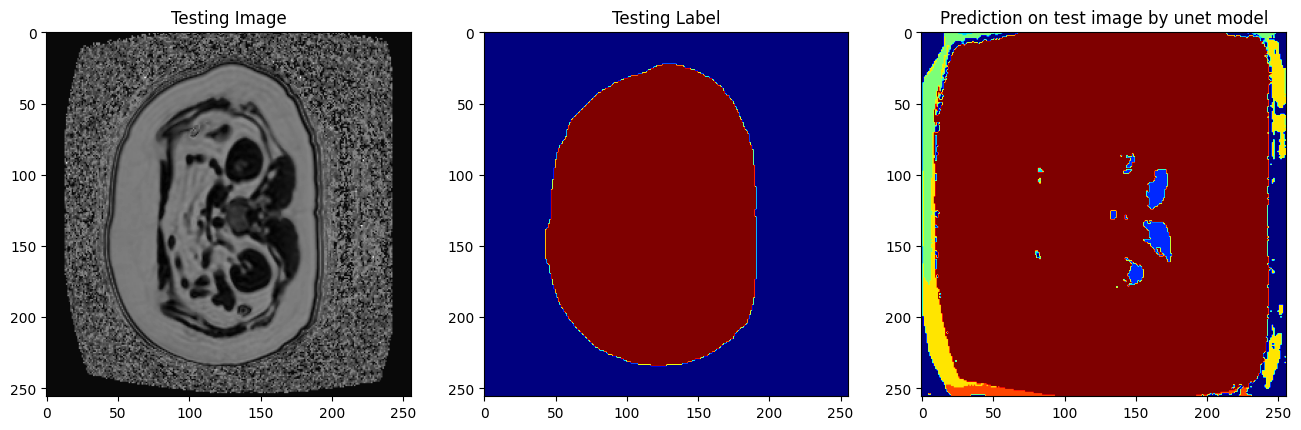

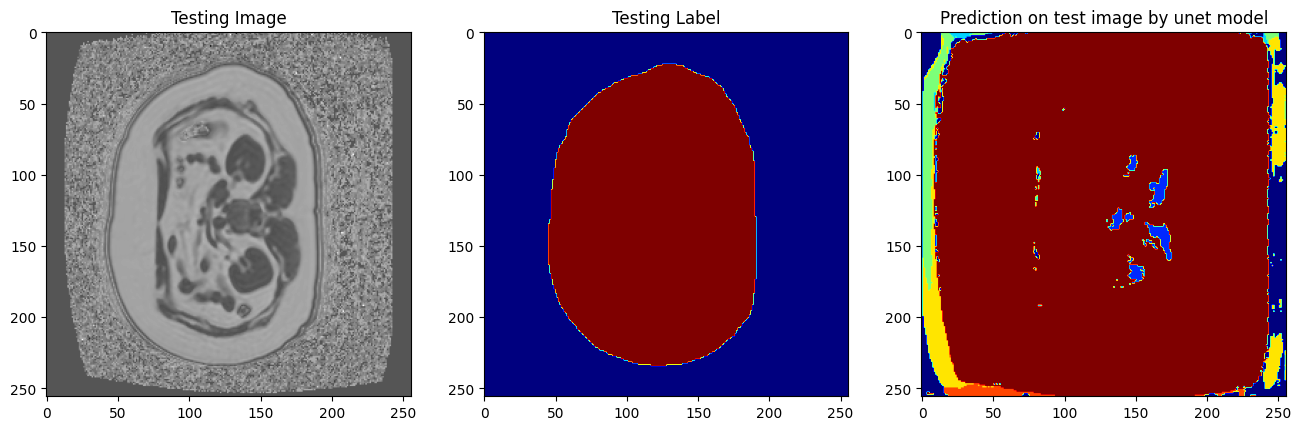

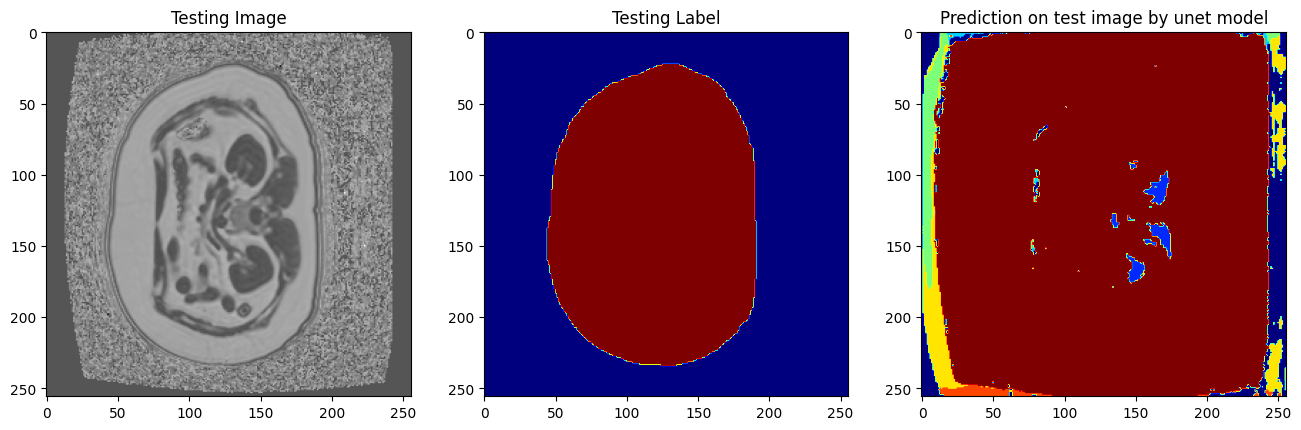

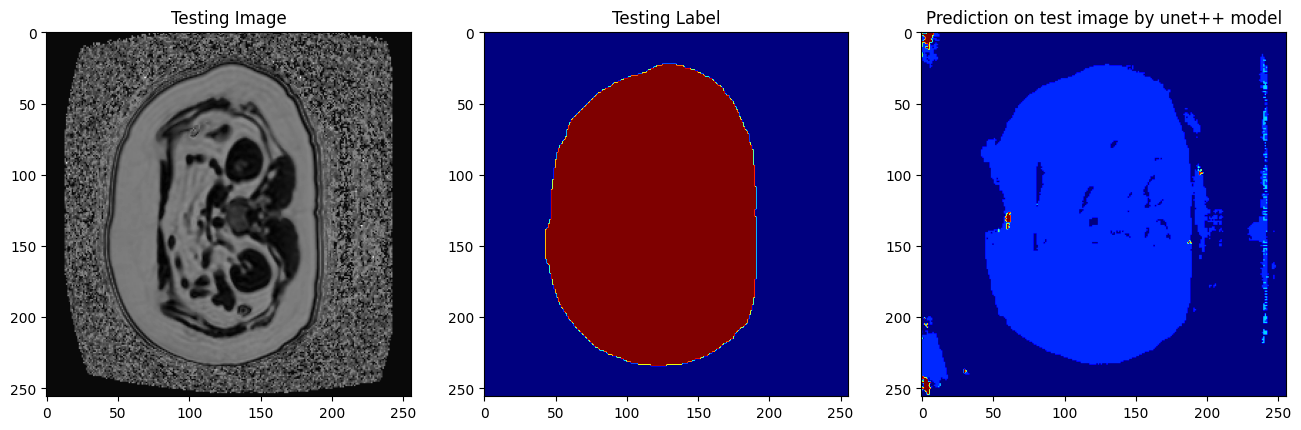

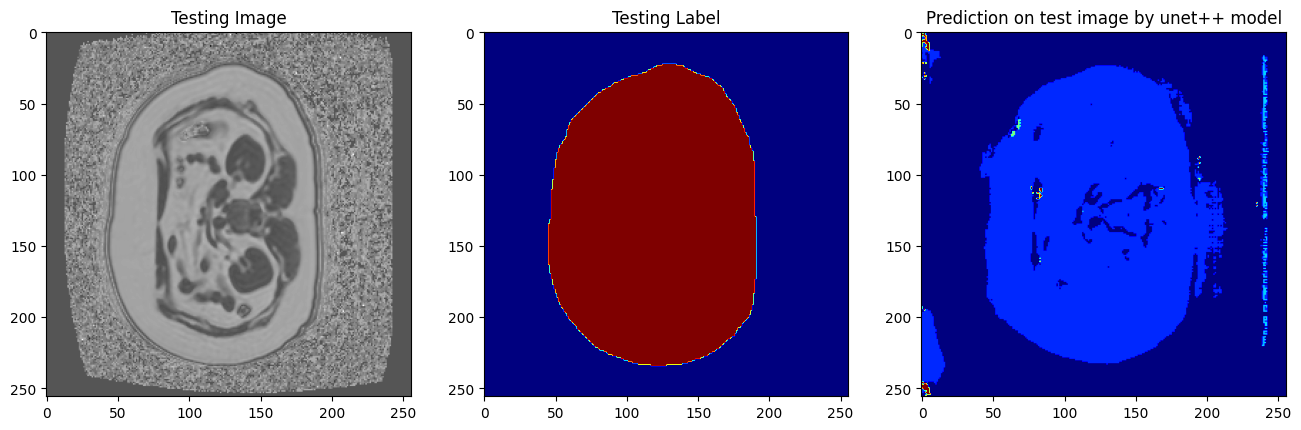

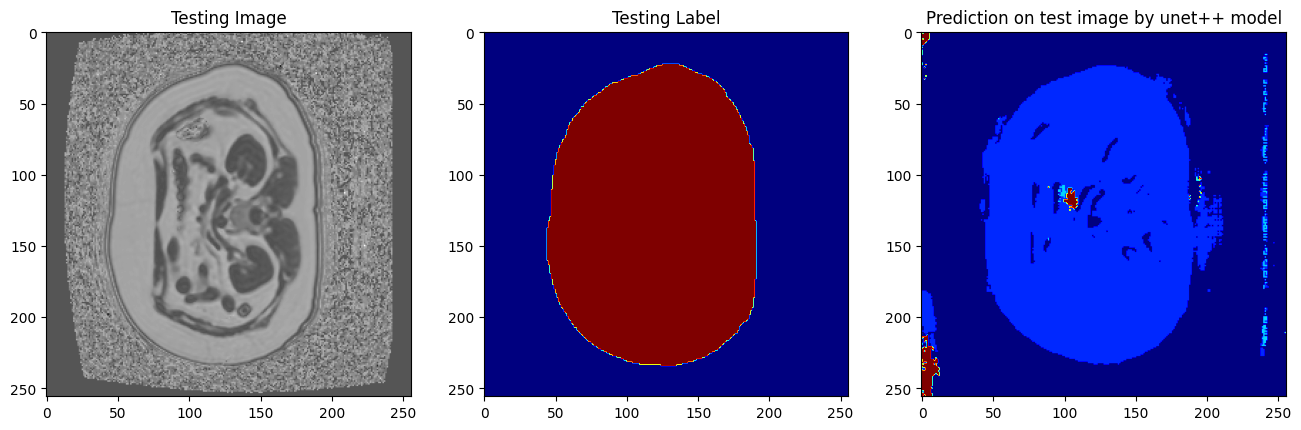

In [ ]:
unetSlices = defaultdict(list)
unetPlusPlusSlices = defaultdict(list)

for i in range(len(unetPlusPlusPredictions)):
    unetPredictedSlice = np.argmax(unetPredictions[i], axis=2).astype(np.uint8)
    unetPlusPlusPredictedSlice =np.argmax(unetPlusPlusPredictions[i], axis=2).astype(np.uint8) 
    volume_name = "-".join(sliced_image_names[i].split("-")[:-1])
    unetSlices[volume_name].append(unetPredictedSlice)
    unetPlusPlusSlices[volume_name].append(unetPlusPlusPredictedSlice)

unetOutputDirectory = 'C:/Users/Mittal/Desktop/thoracic_seg/unet_predictions/'
unetPlusPlusOutputDirectory = 'C:/Users/Mittal/Desktop/thoracic_seg/unet++_predictions/'

os.makedirs(unetOutputDirectory, exist_ok=True)
os.makedirs(unetPlusPlusOutputDirectory, exist_ok=True)

for volume_name, slices in unetSlices.items():
    unetArray = np.stack(slices, axis=-1)
    nii_img = nib.Nifti1Image(unetArray, affine=np.eye(4))
    save_path = os.path.join(unetOutputDirectory,f"{volume_name}.nii")
    nib.save(nii_img, save_path)

for volume_name, slices in unetPlusPlusSlices.items():
    unetPlusPlusArray = np.stack(slices, axis=-1)
    nii_img = nib.Nifti1Image(unetPlusPlusArray, affine=np.eye(4))
    save_path = os.path.join(unetPlusPlusOutputDirectory,f"{volume_name}.nii")
    nib.save(nii_img, save_path)

for i in range(3):
    test_img = sliced_image_dataset[i]
    ground_truth = sliced_mask_dataset[i]
    predicted_img = np.argmax(unetPredictions[i],axis=2)
    plt.figure(figsize=(16, 8))
    plt.subplot(1,3,1)
    plt.title('Testing Image')
    plt.imshow(test_img, cmap='gray')
    plt.subplot(1,3,2)
    plt.title('Testing Label')
    plt.imshow(ground_truth, cmap='jet')
    plt.subplot(1,3,3)
    plt.title('Prediction on test image by unet model')
    plt.imshow(predicted_img, cmap='jet')
    plt.show()
    plt.close()

for i in range(3):
    test_img = sliced_image_dataset[i]
    ground_truth = sliced_mask_dataset[i]
    predicted_img = np.argmax(unetPlusPlusPredictions[i],axis=2)
    plt.figure(figsize=(16, 8))
    plt.subplot(1,3,1)
    plt.title('Testing Image')
    plt.imshow(test_img, cmap='gray')
    plt.subplot(1,3,2)
    plt.title('Testing Label')
    plt.imshow(ground_truth, cmap='jet')
    plt.subplot(1,3,3)
    plt.title('Prediction on test image by unet++ model')
    plt.imshow(predicted_img, cmap='jet')
    plt.show()
    plt.close()